In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
import pickle


In [2]:
data = pd.read_csv("archive\heart.csv")  # có thể đọc trực tiếp từ string nếu chưa có file

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
def preprocess_data(df):
    df = df.copy()
    
    # Kiểm tra missing
    if df.isnull().sum().sum() > 0:
        df = df.dropna()
    
    # Chuyển cột phân loại sang số
    for col in ['sex','cp','fbs','restecg','exang','slope','ca','thal']:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
    
    X = df.drop('target', axis=1)
    y = df['target']
    
    return X, y

X, y = preprocess_data(data)


CHia test train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Train Random Forest

In [23]:
def train_rf(X_train, y_train):
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
    model.fit(X_train, y_train)
    return model

model = train_rf(X_train, y_train)


Dự đoán & đánh giá

✅ Accuracy: 0.9805194805194806

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       150
           1       0.98      0.98      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



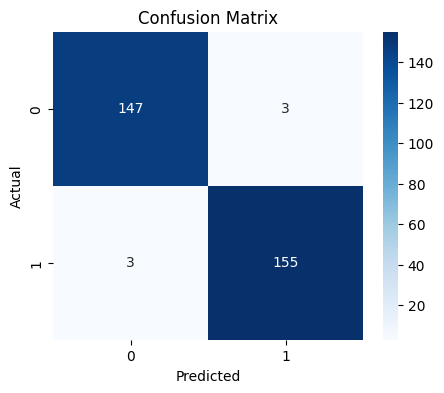

Precision: 0.981, Recall: 0.981, F1-score: 0.981


In [24]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1-score: {f1:.3f}")


Biểu đồ Feature Importance

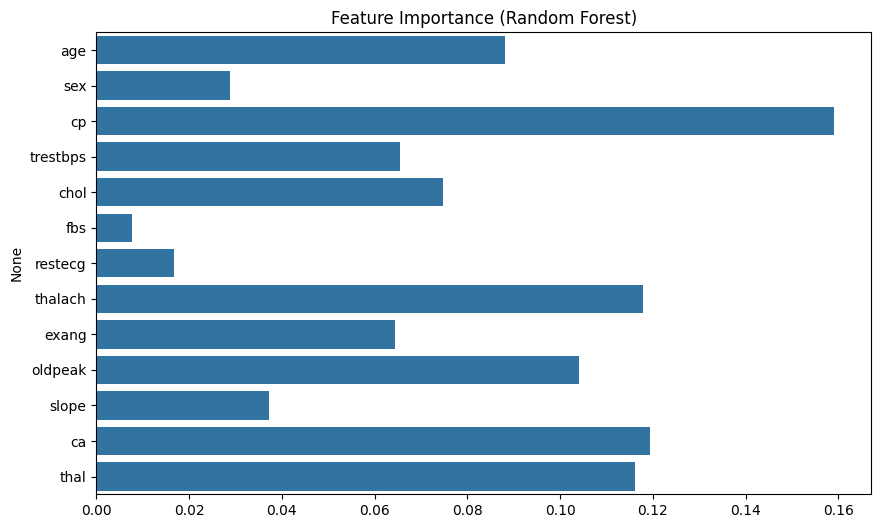

In [25]:
importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
sns.barplot(x=importance, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()


Lưu

In [26]:
with open("rf_heart_model.pkl", "wb") as f:
    pickle.dump(model, f)
print("✅ Random Forest model đã được lưu thành công")


✅ Random Forest model đã được lưu thành công


Test dự đoán với input người dùng

In [28]:
# Load lại mô hình
with open("rf_heart_model.pkl", "rb") as f:
    model = pickle.load(f)

columns = ['age','sex','cp','trestbps','chol','fbs','restecg',
           'thalach','exang','oldpeak','slope','ca','thal']

print("Nhập dữ liệu bệnh nhân (13 giá trị, phân tách bằng dấu phẩy):")
user_input = input(f"Nhập {len(columns)} giá trị:\n")

values = [float(x.strip()) for x in user_input.split(",")]
if len(values) != len(columns):
    raise ValueError(f"Nhập đủ {len(columns)} giá trị!")

df_user = pd.DataFrame([values], columns=columns)

prediction = model.predict(df_user)[0]
prob = model.predict_proba(df_user)[0][1]

print("\n🔹 Kết quả dự đoán:")
print(f"Target dự đoán: {prediction} ({'Có nguy cơ bệnh tim' if prediction==1 else 'Không có nguy cơ'})")
print(f"Xác suất nguy cơ: {prob:.2f}")


Nhập dữ liệu bệnh nhân (13 giá trị, phân tách bằng dấu phẩy):

🔹 Kết quả dự đoán:
Target dự đoán: 1 (Có nguy cơ bệnh tim)
Xác suất nguy cơ: 0.75
